# CHAPTER15 OpenCV 이용 및 이미지 데이터 전처리

In [4]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import time
%matplotlib inline 

def img_show(name, img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()



## 15.1 이미지 데이터 기초

### 15.1.1 RGB 데이터

- 이미지는 픽셀이라는 작은 값의 집합.
- 컬러 이미지는 Red, Green, Blue로 RGB라 표현하며 범위는 0~255. 수치가 클수록 밝다


### 15.1.2 이미지 데이터 형식

- PNG : 무손실 압축 가능. 여러 색상 재현 가능
- JPG : 여러 색상 재현 가능. 질은 떨어지나 작은 용량을 압축가능
- PDF : 화질이 좋고 용량이 큼
- GIF : 애니메이션 표현가능

## 15.2 OpenCV 기초

### 15.2.1 이미지를 읽어 출력하기


```
img = cv2.imread('sample.jpg')
cv2.imshow('sample', img)
```



### 15.2.2 이미지를 만들어 저장하기

- cv2에선 이미지를 RGB 순서가 아니라 BGR 순서로 처리하므로 주의할 것.

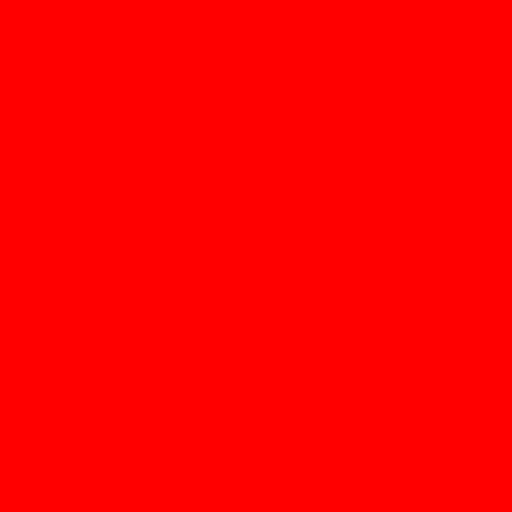

In [7]:
import numpy as np 
from google.colab.patches import cv2_imshow

img_size = (512,512)

img = np.array([[[0,0,255] for _ in range(img_size[1])] for _ in range(img_size[0])])

cv2_imshow(img)

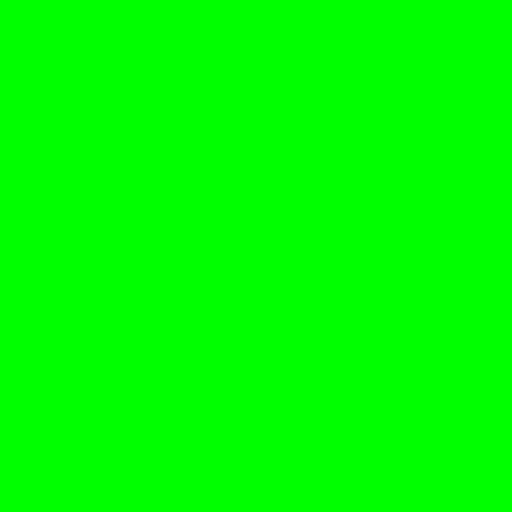

In [8]:
img = np.array([[[0,255,0] for _ in range(img_size[1])] for _ in range(img_size[0])])
cv2_imshow(img)

### 15.2.3 트리밍과 리사이즈
- 트리밍 : 이미지의 일부를 잘라내는 작업
- 리사이즈 : 이미지의 크기를 변형

169001437/169001437 [==============================] - 2s 0us/step


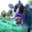

In [9]:
from keras.datasets import cifar100
import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar100.load_data()
img = X_train[0]
cv2_imshow(img)

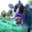

In [11]:
cv2.imwrite('img.png', img)
cow = cv2.imread('/content/img.png')
cv2_imshow(cow)
size = cow.shape # = (32, 32, 3)
# 행렬의 일부만 가져옴 = 이미지 자르기. n등분 하려몬 가로,세로 크기 나눈다
cow_trimming = cow[:size[0]//2, : size[1]//3] # cow[:size[0]//2, : size[1]//3].shape = (16, 10, 3)
cv2_imshow(cow_trimming)

In [12]:
# 가로 세로 1/3로 축소 
cow_small_resize = cv2.resize(cow, (cow.shape[1]//3, cow.shape[0]//3))
cv2_imshow(cow_small_resize)

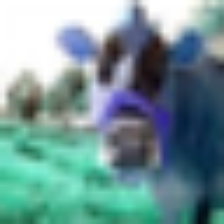

In [13]:
cow_big_resize = cv2.resize(cow, (224,224))
cv2_imshow(cow_big_resize)

### 15.2.4 회전 및 반전

- 이미지 회전시 아핀 변환을 하는 cv2.warpAffine() 함수를 사용한다
- 이때 필요한 행렬은 cv2.getRotationMatrix2D로 얻을 수 있다
- 반전은 cv2.flip(이미지, 대상 축)

- warpAffine() 함수 사용에 필요한 행렬을 만든다
- 회전의 중심, 회전 각도, 이미지 배율

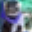

In [15]:
mat = cv2.getRotationMatrix2D(tuple(np.array(cow.shape[:2])/2), 180, 2.0) # 이미지 중심설정, 180도 회전, 2배 확대
ro_img = cv2.warpAffine(cow, mat, cow.shape[:2])
cv2_imshow(ro_img)

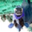

In [16]:
flip_img = cv2.flip(cow,0)
cv2_imshow(flip_img)

### 15.2.5 색조 변환 및 색상 반전
- RGB 를 다른 색 공간으로 변환할 수 있다 -> Lab색 공간으로 변환
- cv2.cvtColor(cow, cv2.COLOR_RGB2GRAY) : 흑백 이미지로 변환
- cv2.bitwise_not(cow) : 색상 반전. 8bit로 표현된 각화소의 비트를 조작할 수 있다. not은 각 비트를 반전시킨다

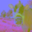

In [17]:
my_img = cv2.cvtColor(cow, cv2.COLOR_RGB2LAB)
cv2_imshow(my_img)

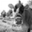

In [18]:
my_img = cv2.cvtColor(cow, cv2.COLOR_RGB2GRAY)
cv2_imshow(my_img)

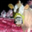

In [19]:
my_img = cv2.bitwise_not(cow)
cv2_imshow(my_img)

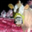

In [21]:
cow = cv2.imread('/content/img.png')
for i in range(len(cow)):
    for j in range(len(cow[i])):
        for k in range(len(cow[i][j])):
            cow[i][j][k] = 255 - cow[i][j][k]

cv2_imshow(cow)

## 15.3 OpenCV 이용

### 15.3.1 임계값 처리(이진화)

- 이미지의 용량을 줄이기위해 일정 이상으로 밝거나 어두운 것을 모두 같은 값으로 만들어버리는 것을 임계값 처리라 한다
- cv2.threshold(처리하는 이미지, 임곗값, 최댓값, THRESH_BINARY,THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TRUNC, THRESH_TOZERO_INV )
 


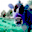

In [22]:
cow = cv2.imread('/content/img.png')

retval, my_img = cv2.threshold(cow, 75, 255, cv2.THRESH_TOZERO)
cv2_imshow(my_img)

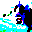

In [23]:
retval, my_img = cv2.threshold(cow, 100, 255, cv2.THRESH_BINARY)
cv2_imshow(my_img)

### 15.3.2 마스킹


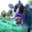

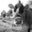

In [27]:
cow = cv2.imread('/content/img.png')

# 두번째 인수를 0으로 지정하면 채널수가 1인 이미지로 변환해서 읽음
mask = cv2.imread('/content/img.png', 0)

# 원래 이미지의 같은크기로 리사이즈
mask = cv2.resize(mask, (cow.shape[1], cow.shape[0]))

# 세번째 인수로 마스크용 이미지를 선택
my_img = cv2.bitwise_and(cow,cow,mask=mask)

cv2_imshow(my_img)
cv2_imshow(mask)

### 15.3.3 흐림
- 이미지를 흐리게 하려면 픽셀 주위의 n개 x n개 픽셀과의 평균을 구한다

- cv2.GaussianBlur(원본 이미지, nxn마스크크기 설정.n은 홀수, x축 방향의 편차(일반적으로 0지정)

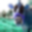

In [28]:
my_img = cv2.GaussianBlur(cow, (5,5), 0)
cv2_imshow(my_img)

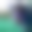

In [29]:
my_img = cv2.GaussianBlur(cow, (21,21), 0)
cv2_imshow(my_img)

### 15.3.4 노이즈 제거

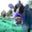

In [30]:
my_img = cv2.fastNlMeansDenoisingColored(cow)
cv2_imshow(my_img)

### 15.3.5 팽창 및 침식
- 주로 이진 이미지로 처리된다
- 어떤 한 픽셀을 중심으로 필터 내의 최댓값을 중심값으로 하는 것을 팽창
- 최솟값을 중심값으로 하는 것을 침식

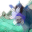

In [31]:
# 팽창
filt = np.array([[0,1,0],
                 [1,0,1],
                 [0,1,0]], np.uint8)

my_img = cv2.dilate(cow, filt)

cv2_imshow(my_img)

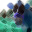

In [32]:
# 침식
my_img = cv2.erode(cow, filt)

cv2_imshow(my_img)

In [35]:
def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    img_size = img.shape
    filter1 = np.ones((3,3))

    image = cv2.imread(img)
    if flip:
        image = cv2.flip(image, 1)
    if thr:
        retval, image = cv2.threshold(image, 100, 255, cv2.THRESH_TOZERO)
    if filt:
        image = cv2.GaussianBlur(image, (5, 5), 0)
    if resize:
        image = cv2.resize(cv2.resize(image, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0]))
    if erode:
        image = cv2.erode(image, filter1)
                          
    return image

cow = cv2.imread('/content/img.png')


In [33]:
def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    methods = [flip, thr, filt, resize, erode]

    img_size = img.shape
    filter1 = np.ones((3,3))

    images = [img]

    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])
    doubling_images = lambda f, imag: np.r_[imag, [f(i) for i in imag]]


    for func in scratch[methods]:
        images = doubling_images(func, images)
        
    return images